In [1]:
import rootpy.ROOT as R
R.gROOT.SetBatch(True)
from rootpy.io import root_open, DoesNotExist
from rootpy.plotting import Canvas, Hist, Legend

In [26]:
def ui( h, x1, x2 ) :
    bx1 = h.GetXaxis().FindBin( x1 )
    bx2 = h.GetXaxis().FindBin( x2 )
    print "# of Bins : ", (bx2 - bx1)
    return h.Integral( bx1, bx2 )


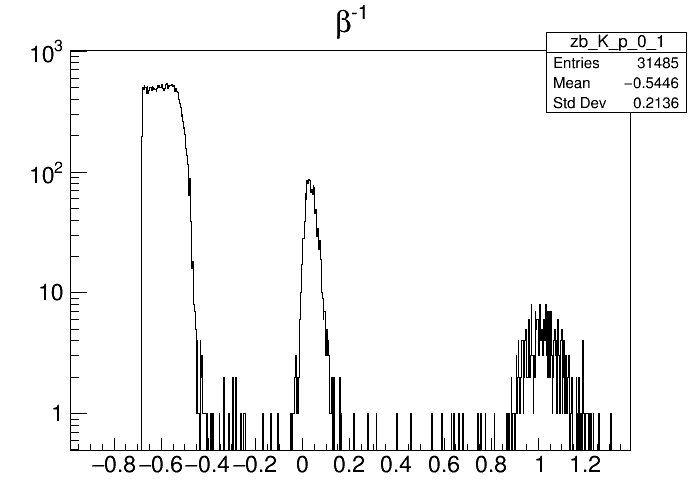

In [30]:
f = root_open( "/Users/danielbrandenburg/bnl/local/work/rcpMaker/products/PidHisto_w_elec_eff_K.root" )
c = Canvas( )
c.SetLogy(1)

zb = f.Get( "tof/zb_K_p_0_1" )
ax = zb.GetXaxis()


zb.Draw()
c

In [43]:
r1 = ( -0.45, -0.05 )
r2 = ( 0.15, 0.9 )
rPi = (-1, -0.45)
rK = ( -0.05, 0.15 )

I1 = ui( zb, r1[0], r1[1] )
I2 = ui( zb, r2[0], r2[1] )
IK = ui( zb, rK[0], rK[1] )
IPi = ui( zb, rPi[0], rPi[1] )

print "background :", (I1 + I2)
print " IK =", IK

# of Bins :  133
# of Bins :  250
# of Bins :  67
# of Bins :  180
background : 66.0
 IK = 1526.0


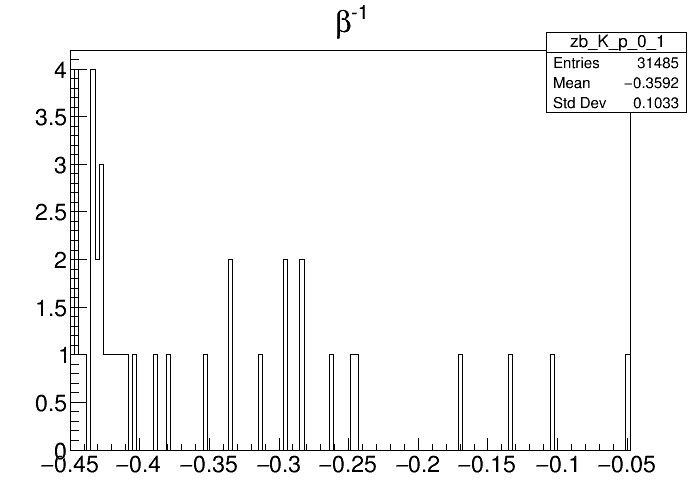

In [41]:
c.SetLogy(0)
zb.GetXaxis().SetRangeUser( r1[0], r1[1] )
zb.Draw()
c

In [24]:
(I1+I2)/ui( zb, -1, 1.5 )

# of Bins :  834


0.0015544679628116899

$e^{-(dd - dEdx)^2 / ( scale * sigma )^2  }$

In [44]:
def gy( a, b, c ) :
    ff = R.TF1( "f1", "gaus" )
    ff.SetParameters( a, b, c )
    return ff.Integral( -10, 10 )
    

In [50]:
x2 = gy( 2.52e2, 3.31e-3, 1.21e-2 )
nll = gy( 2.41e2, 3.41e-3, 1.29e-2 )

print "x^2 =", x2
print "nll =", nll
print "(x^2 - nll) / (nll) =", (x2 - nll ) / ( nll )

 x^2 = 7.643210935
nll = 7.792856643
(x^2 - nll) / (nll) = -0.0192029335135


In [51]:
nll / 3e-3

2597.618881000106

In [52]:
x2/3e-3

2547.7369783349486

In [53]:
bc = 2.615000e+03

In [56]:
(bc - (x2/3e-3)) / bc

0.02572199681263915